<a href="https://colab.research.google.com/github/danilosrm/projeto_MDD/blob/main/Z_Proj_PortoSeguro_v2611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INCLUSÃO DAS BIBLIOTECAS QUE SERÃO NECESSÁRIAS NO DECORRER DO CÓDIGO


1.   Pandas: inclusão dos dados em um dataframe
2.   Numpy: biblioteca númerica para *comparações*
3.   Matplotlib: inclusão da biblioteca *pyplot* para geração de gráficos
4.   Seaborn: biblioteca de geração de visualização de dados
5.   Sklearn: somente biblioteca de Matriz de Contingência



In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 14.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sweetviz as xx


#CARGA DOS ARQUIVOS DE TREINO

- Devido ao tamanho original do arquivo foi necessário particioná-lo em 2 para que o Github aceitasse os arquivos e pudessemos fazer uma leitura direta dele no local de armazenamento, independente do programa gerar de código usado.

In [ ]:
# Parte 1 do arquivo
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_01.csv'
  
df_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da primeira parte: ', df_train['id'].count())

# Parte 2 do arquivo 
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/01%20-%20TRAIN/train_02.csv'  
  
df2_train = pd.read_csv(url, error_bad_lines=False, delimiter=';')
print('Quantidade registro da segunda parte: ', df2_train['id'].count())

# Junção das partes  
df_train = df_train.append(df2_train)
print('Quantidade total registros: ', df_train['id'].count())


Quantidade registro da primeira parte:  297605
Quantidade registro da segunda parte:  297607
Quantidade total registros:  595212


In [ ]:
#Analise inicial dos dados carregados, verificando se existem campos com valores nulos. 

df_train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 0 to 297606
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
# Demonstração dos 5 primeiras linhas de registros de forma Transversal

df_train.head(5).T

,0,1,2,3,4
id,7.000000,9.000000,13.000000,16.000000,17.000000
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000
ps_ind_02_cat,2.000000,1.000000,4.000000,1.000000,2.000000
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000
ps_ind_04_cat,1.000000,0.000000,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000


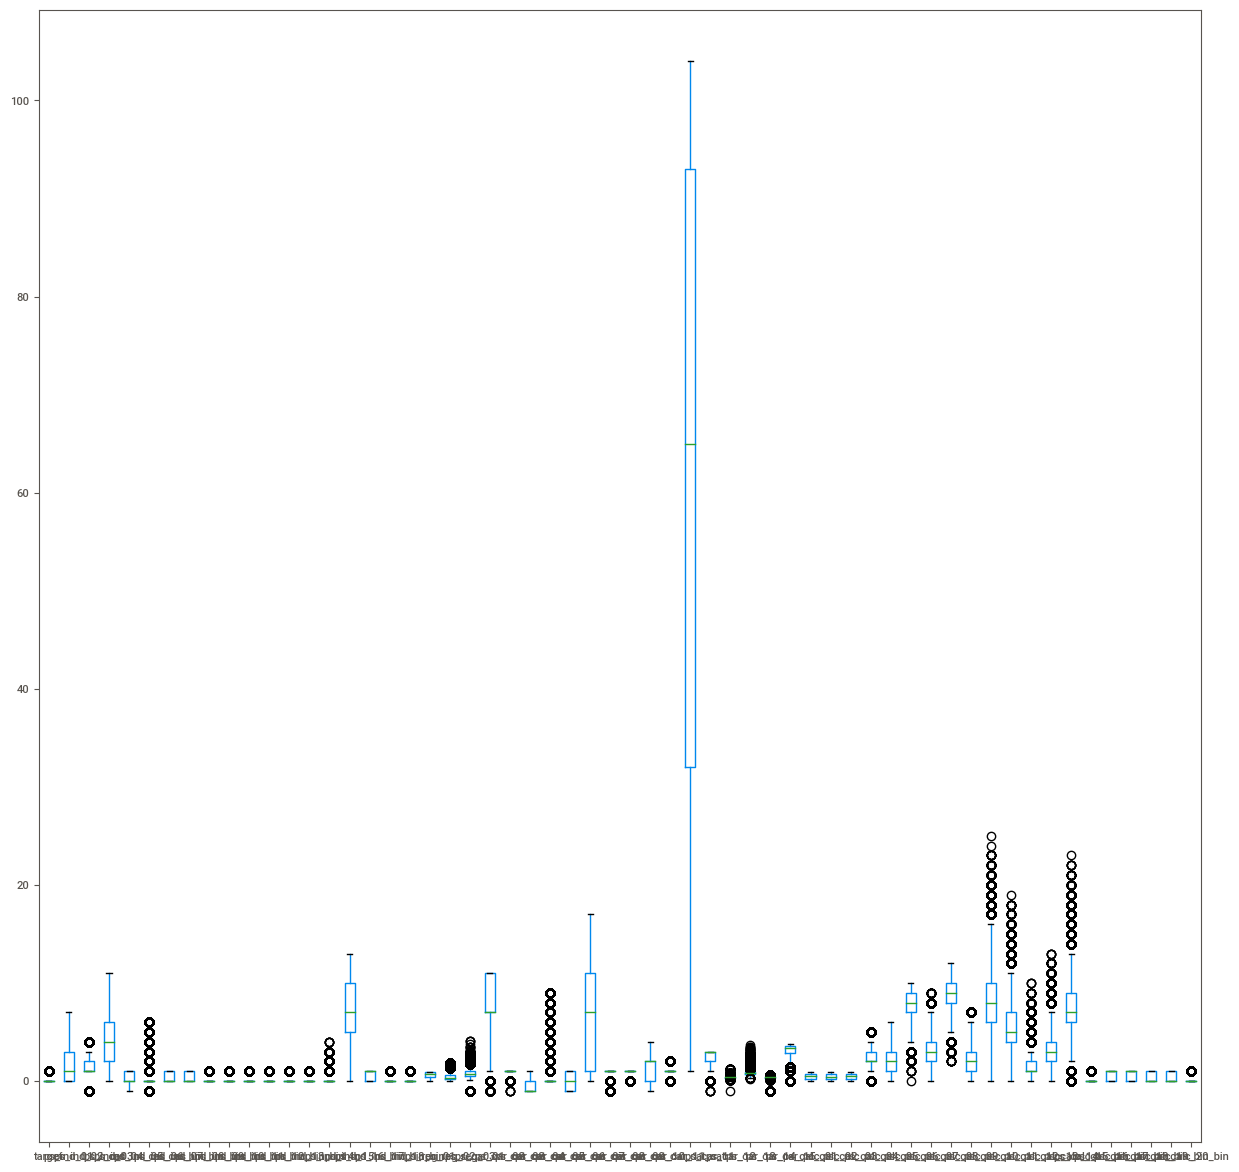

In [ ]:
# Tentativa de geração da plotagem das colunas existentes, porém como a quantidade é elevado, o gráfico acaba ficando
# de forma desconfigurada e com o entendimento totalmente ilegivel. 
# Ainda é possível ver uma coluna que destoa das demais, sem conseguir identificar.

# Retirado a coluna "id" que faz a identificação dos registros.
df_train.drop('id', axis=1).plot.box()
plt.rcParams['figure.figsize'] = [5, 15]
plt.show()

In [ ]:
#Gerar um arquivo com a analise completa inicial em html 
study_report = xx.analyze(df_train) 


                                             |          | [  0%]   00:00 -> (? left)

AttributeError: ignored

In [ ]:
study_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Analise da Coluna Target

In [ ]:
# Idenficação do valor Mínimo e Máximo

print('Valor mínimo do coluna Target: ', df_train['target'].min())
print('Valor maximo do coluna Target: ', df_train['target'].max())

Valor mínimo do coluna Target:  0
Valor maximo do coluna Target:  1


In [ ]:
# Quantidade de registros para cada valor da coluna 'Target'

qtd_target = df_train['target'].value_counts()

print(qtd_target)

0    573518
1     21694
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


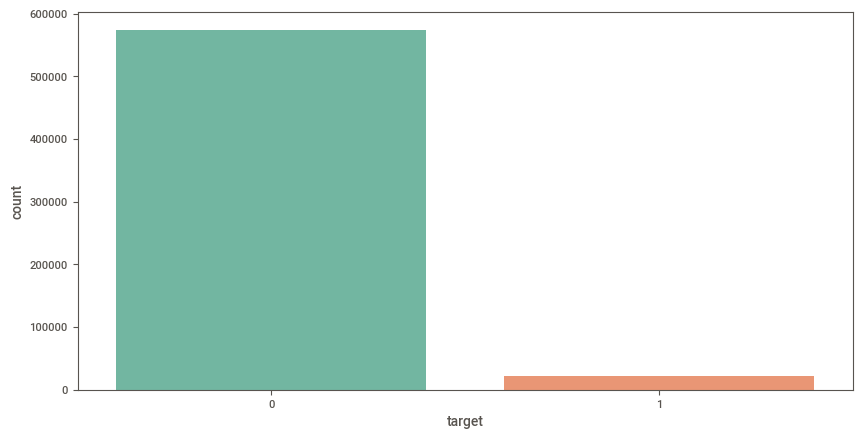

In [ ]:
# Gráfico da coluna "Target", utilizando a biblioteca "matplotlib" 
# O intuido é demonstrar a diferença na quantidade de registros entre os valores da coluna

plt.figure(figsize=(10,5))
sns.countplot(df_train['target'], palette="Set2")

## ANALISE DO RESULTADO:
***
### Verificamos que o item 0 demonstra quem não solicitou seguro e 1 quem solicitou. Quantidade de registros que não solicitam sinistro é muito alto, o que compromete a previsão dos dados.

***

**Para um bom modelo, precisamos de dados balanceados. O modelo da porto seguro é desbalanceado. A Porto Seguro pagou isso para ter um modelo preditivo assertivo. A predição do modelo sofre um pouco, porque temos diminuição no acerto. O problema da porto seguro é conseguir um modelo que mesmo com esse desbalanceamento, consiga fazer um modelo assertivo para ela. Não vamos deixar de fazer, fazemos um modelo mais simples.**

# Separação das colunas em 8 grupos

Inteção é facilitar a análise em grupos separadas, mas que parecem ser da mesma característica.

* "n" indica a numeração da coluna.

1.   **df_ps_ind**: colunas "ps_ind_n".
2.   **df_ps_ind_cat**: colunas "ps_ind_n_cat".
3.   **df_ps_ind_bin**: colunas "ps_ind_n_bin".
4.   **df_ps_reg**: colunas "ps_ps_reg_n".
5.   **df_ps_car**: colunas "ps_car_n".
6.   **df_ps_car_cat**: colunas "ps_car_n_cat".
7.   **df_ps_cal**: colunas "ps_cal_n".
8.   **df_ps_cal_bin**: colunas "ps_car_bin".






In [ ]:
# LISTA DAS COLUNAS CONFORME GRUPOS

lista_ps_ind = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']

lista_ps_ind_cat = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat']

lista_ps_ind_bin = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin','ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
                    'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']

lista_ps_reg = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03']         

lista_ps_car = ['ps_car_11','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] 

lista_ps_car_cat = ['ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat','ps_car_05_cat', 'ps_car_06_cat', 
                    'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']  

lista_ps_cal = [ 'ps_calc_01','ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06','ps_calc_07', 
                'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11','ps_calc_12', 'ps_calc_13', 'ps_calc_14']

lista_ps_cal_bin = [ 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']



##**GRUPO 1**


In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind = df_train

lista =  lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind = df_ps_ind.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind.drop('id', axis=1).describe()

,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,4.423318,0.012451,7.299922
std,0.187401,1.983789,2.699902,0.127545,3.546042
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,5.000000
50%,0.000000,1.000000,4.000000,0.000000,7.000000
75%,0.000000,3.000000,6.000000,0.000000,10.000000
max,1.000000,7.000000,11.000000,4.000000,13.000000


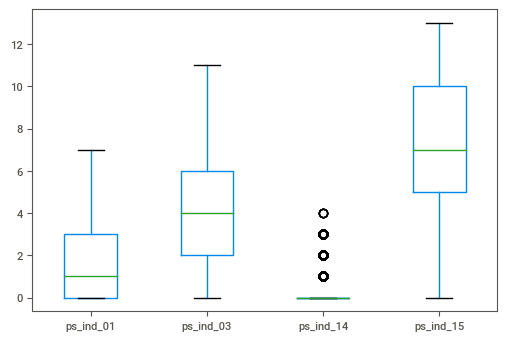

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind.drop(lista_id_target, axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_IND_14
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


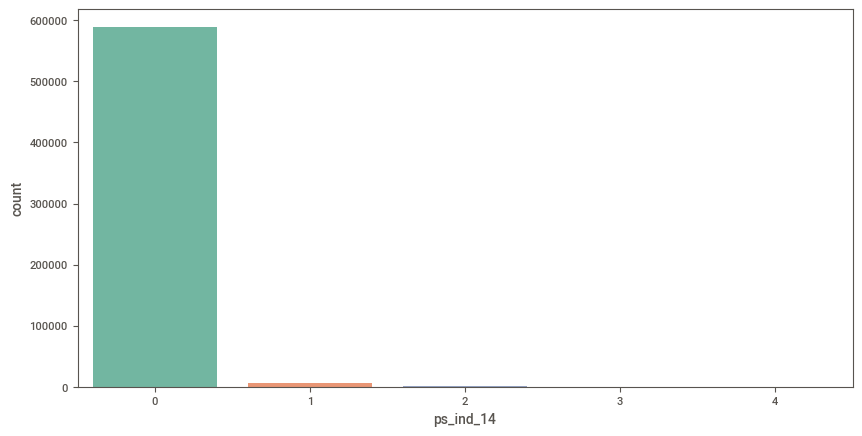

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_ind_14"

qtd_outliers = df_ps_ind['ps_ind_14'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_14')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind['ps_ind_14'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

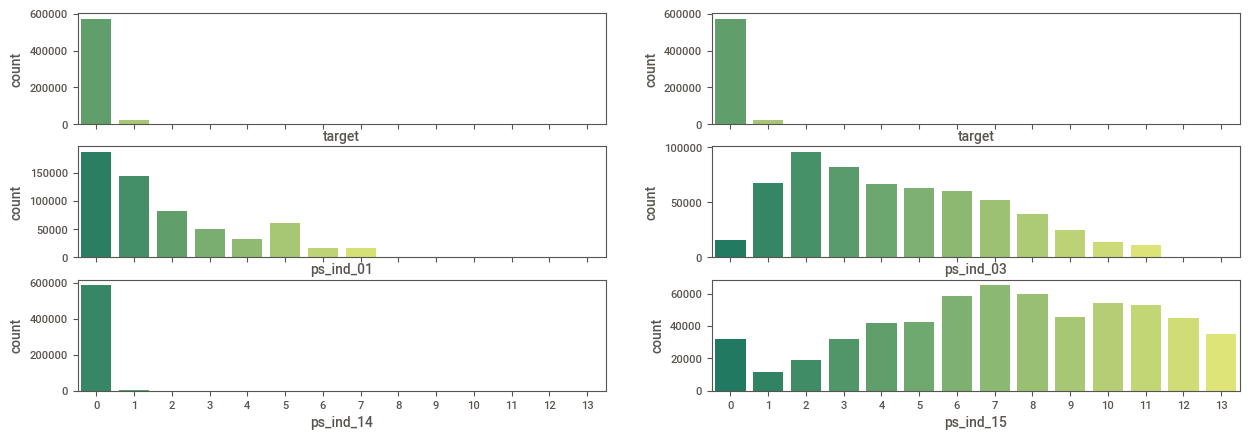

In [ ]:
# Grupo 1: Index(['id', 'target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15'], dtype='object')
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(3,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4, ax5, ax6 = ax.flatten()
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind['target'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind['ps_ind_01'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind['ps_ind_03'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind['ps_ind_14'],palette='summer',ax=ax5)
sns.countplot(df_ps_ind['ps_ind_15'],palette='summer',ax=ax6)


## ANALISE DO RESULTADO - GRUPO 1:
***
### Graficos demonstram que existem diversos valores para tipos de colunas diferentes.
### Atenção para coluna "ps_ind_14", onde analise separada demonstrou que coluna possui 4 tipos de valores, porém a maioria dos registros são de valor zerado.

***


##**GRUPO 2**

In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_cat = df_ps_ind_cat.drop(lista, axis=1)


# Retira a coluna "id" para geração estatistica

df_ps_ind_cat.drop('id', axis=1).describe()

,target,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat
count,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.358943,0.416794,0.405188
std,0.187401,0.664594,0.493311,1.350642
min,0.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2.000000,1.000000,0.000000
max,1.000000,4.000000,1.000000,6.000000


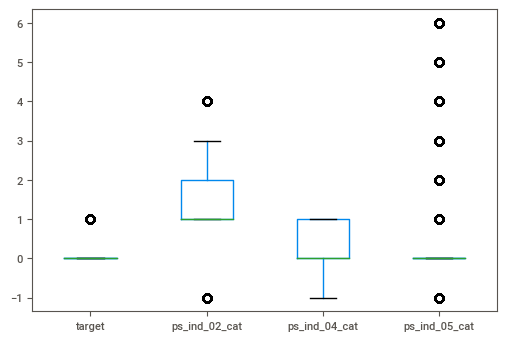

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind_cat.drop('id', axis=1).plot.box()

**Excluir linhas que tem dados faltantes da análise. Se a variável for numérica, pode colocar a média, porém no nosso caso podemos testar excluindo e ver o resultado, se ficar ruim, substuímos pela média. Quem tem dados faltantes, jogar na coluna que tem mais valor**

Quantidade de registros por dimensão na coluna PS_IND_05_CAT
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
*****************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


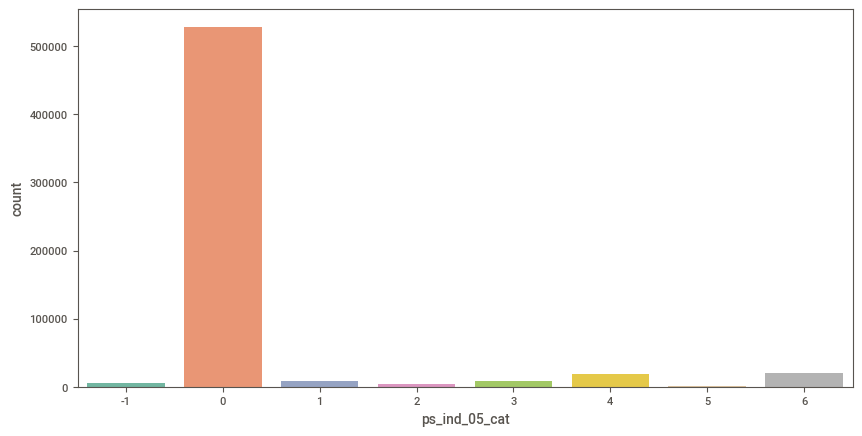

In [ ]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_05_cat"

qtd_outliers= df_ps_ind_cat['ps_ind_05_cat'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_05_CAT')
print(qtd_outliers)

print("*****************************************************************************")


plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind_cat['ps_ind_05_cat'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

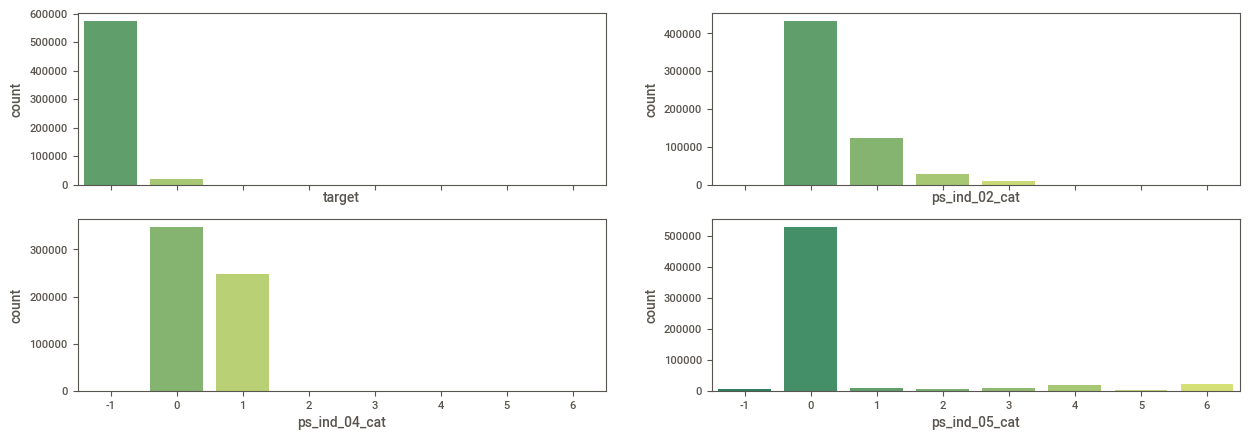

In [ ]:
# Grupo 2: Index(['id', 'target', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat'])
# Gráfico de cada coluna por quantidade de registros por tipo de dado.

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_ind_cat['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_ind_cat['ps_ind_02_cat'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_cat['ps_ind_04_cat'],palette='summer',ax=ax3)
sns.countplot(df_ps_ind_cat['ps_ind_05_cat'],palette='summer',ax=ax4)

## ANALISE DO RESULTADO - GRUPO 2:
***
### Verificado que existem colunas com valores negativos.
### Por descrição do problema, informado que valores negativos eram valores que estavam com valores sem preenchimento
***

##**GRUPO 3**

In [ ]:
# Elimina do Data Frame as colunas que não possuem característica de nome parecido

df_ps_ind_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_ind_bin = df_ps_ind_bin.drop(lista, axis=1)

# Retira a coluna "id" para geração estatistica

df_ps_ind_bin.drop('id', axis=1).describe().T

## Todos os valores estam entre 0 e 1.
## O que identifica que esse conjunto é binario

,count,mean,std,min,25%,50%,75%,max
target,595212.0,0.036448,0.187401,0.0,0.0,0.0,0.0,1.0
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Geração dos valores da matriz comparando o Target com a coluna


print('Confusion matrix - TARGET x PS_IND_06_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_06_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_07_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_07_bin'])
print(matrix)

print('\n*********************************************************************\n')

print('Confusion matrix - TARGET x PS_IND_10_BIN ')
matrix = confusion_matrix(df_ps_ind_bin['target'],df_ps_ind_bin['ps_ind_10_bin'])
print(matrix)

Confusion matrix - TARGET x PS_IND_06_BIN 
[[345846 227672]
 [ 15006   6688]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_07_BIN 
[[427773 145745]
 [ 14450   7244]]

*********************************************************************

Confusion matrix - TARGET x PS_IND_10_BIN 
[[573308    210]
 [ 21682     12]]


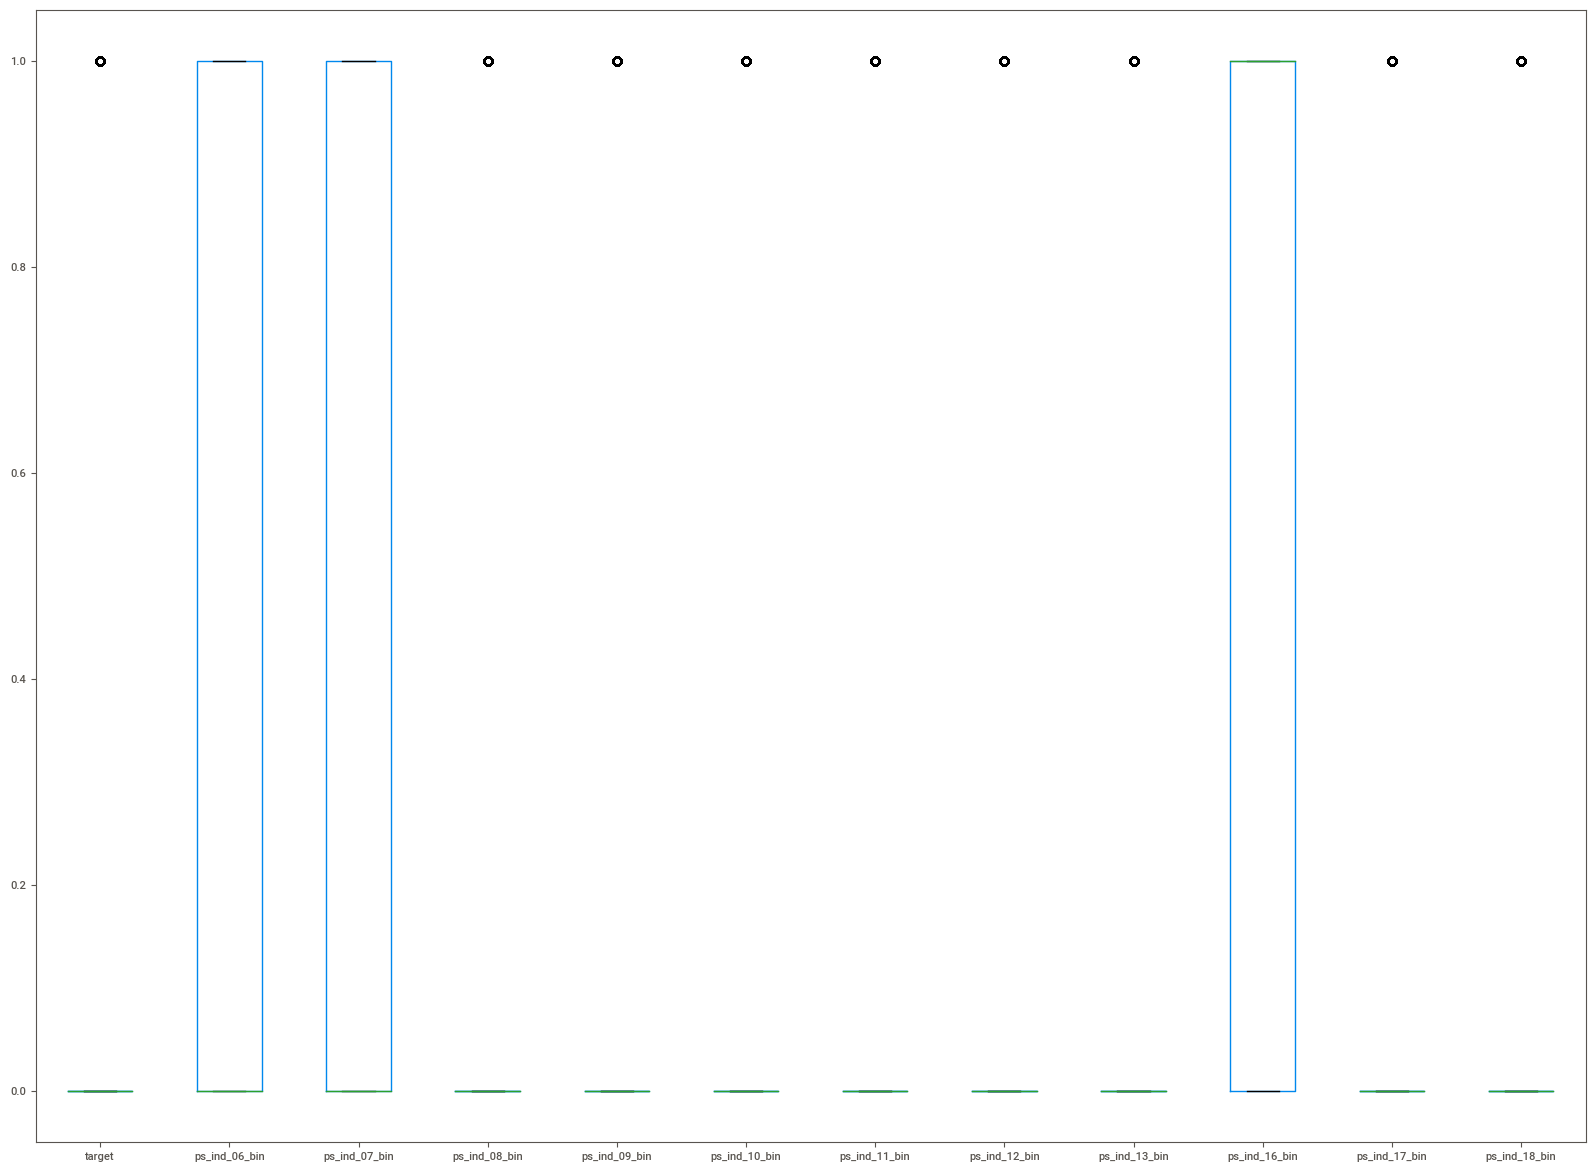

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Gera um gráfico do tipo Boxplot, porém desconsiderando as colunas "ID" e "TARGET"
# Coluna "ID" é somente para associação com dados de outros grupos, mas que possuem mesmo "ID"

lista_id_target = ['id', 'target']
df_ps_ind_bin.drop('id', axis=1).plot.box()
plt.figure(figsize=(10,6))
plt.show()

Quantidade de registros por dimensão na coluna PS_IND_07_BIN
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64
*****************************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


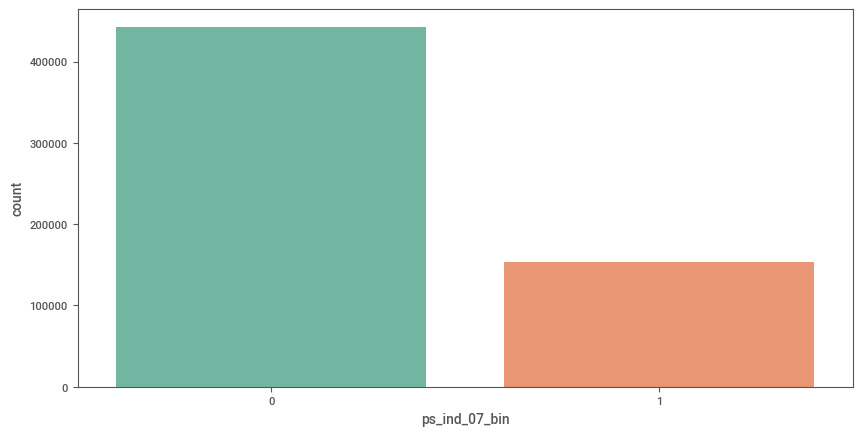

In [ ]:
# Analisando o gráfico anterior, vamos identificar os outliers pertencentes a coluna "ps_ind_07_bin"

qtd_outliers= df_ps_ind_bin['ps_ind_07_bin'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_IND_07_BIN')
print(qtd_outliers)

print("*****************************************************************************")


plt.figure(figsize=(10,5))
sns.countplot(df_ps_ind_bin['ps_ind_07_bin'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

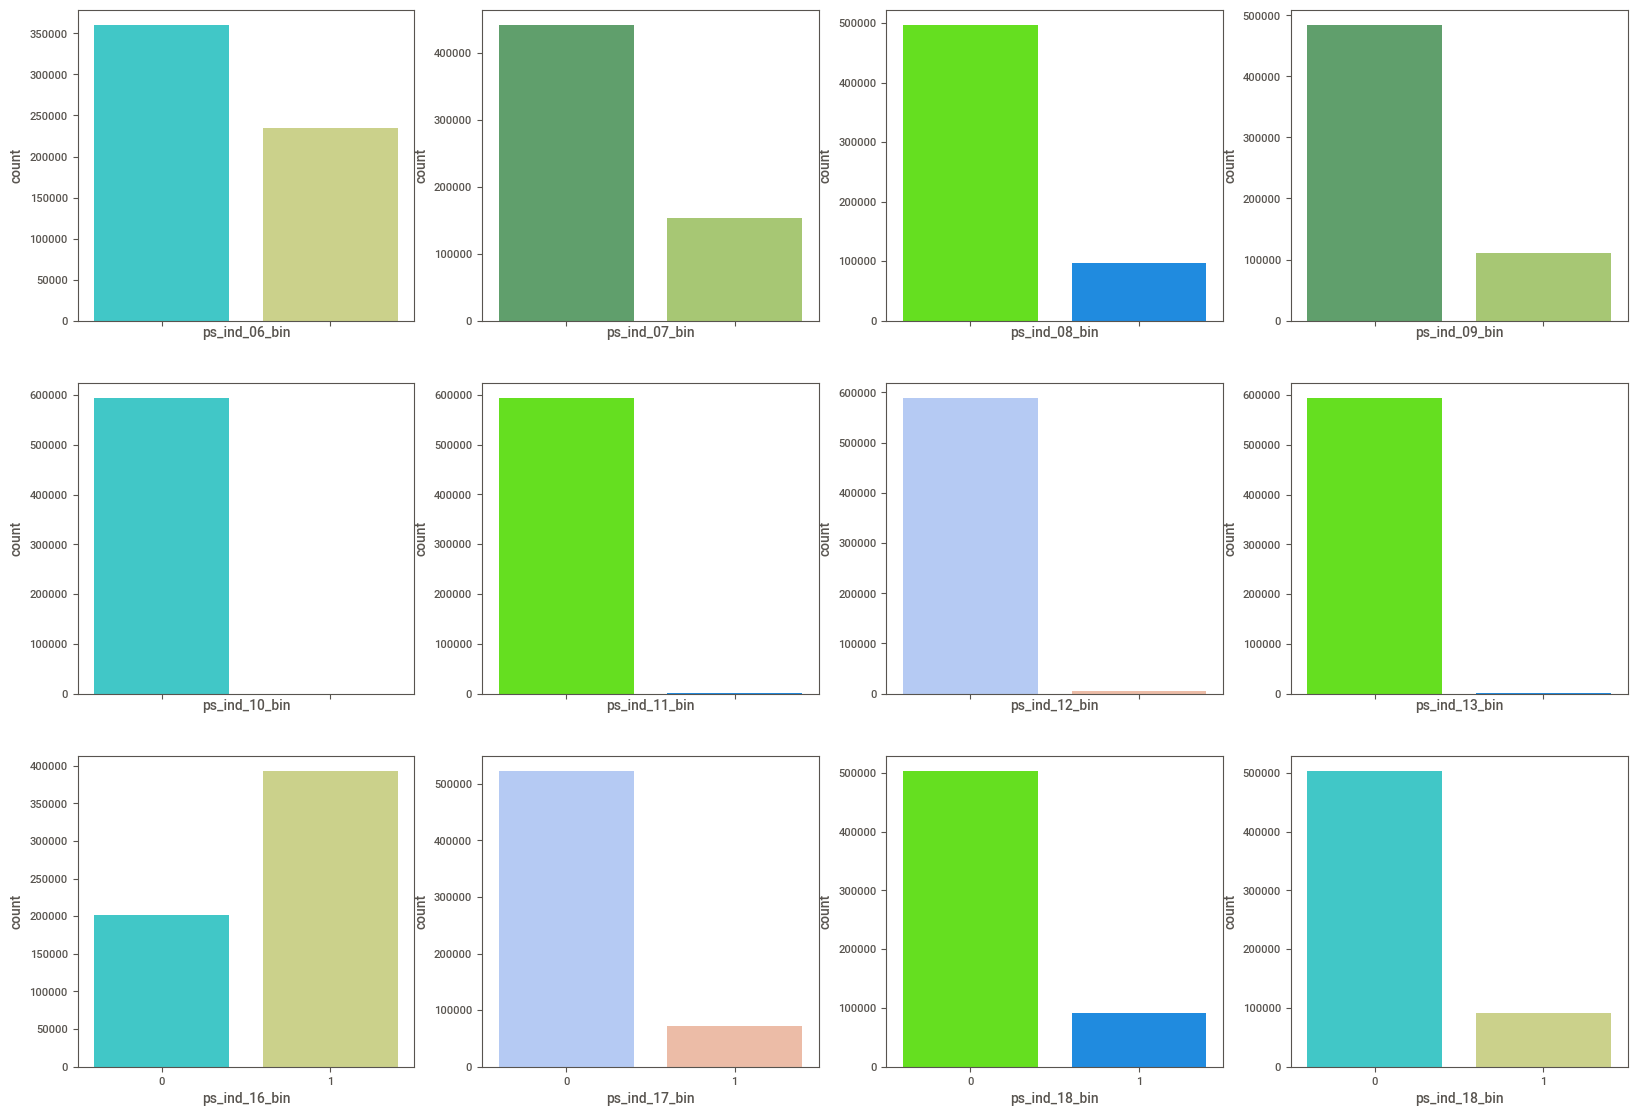

In [ ]:
# Grupo 3: Index(['id', 'target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
#                                 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin')

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_ind_bin['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_ind_bin['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(df_ps_ind_bin['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_ind_bin['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(df_ps_ind_bin['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_ind_bin['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_ind_bin['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_ind_bin['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_ind_bin['ps_ind_16_bin'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_ind_bin['ps_ind_17_bin'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_ind_bin['ps_ind_18_bin'],palette='rainbow',ax=ax12)

#ANALISE DO RESULTADO - GRUPO 3:
A maior parte dos gráficos são parecidas com o target, 0 e 1. Os 3 últimos estão discrepantes. Seria o caso de termos acurácia alta com os dados próximos?
A variável x está com xx% de valores nulos, por esse motivo será realizado isso.



##**GRUPO 4**

In [ ]:
df_ps_reg = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_car + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_reg = df_ps_reg.drop(lista, axis=1)

df_ps_reg.describe()

,id,target,ps_reg_01,ps_reg_02,ps_reg_03
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.610991,0.439184,0.551102
std,4.293678e+05,0.187401,0.287643,0.404264,0.793506
min,7.000000e+00,0.000000,0.000000,0.000000,-1.000000
25%,3.719915e+05,0.000000,0.400000,0.200000,0.525000
50%,7.435475e+05,0.000000,0.700000,0.300000,0.720677
75%,1.115549e+06,0.000000,0.900000,0.600000,1.000000
max,1.488027e+06,1.000000,0.900000,1.800000,4.037945


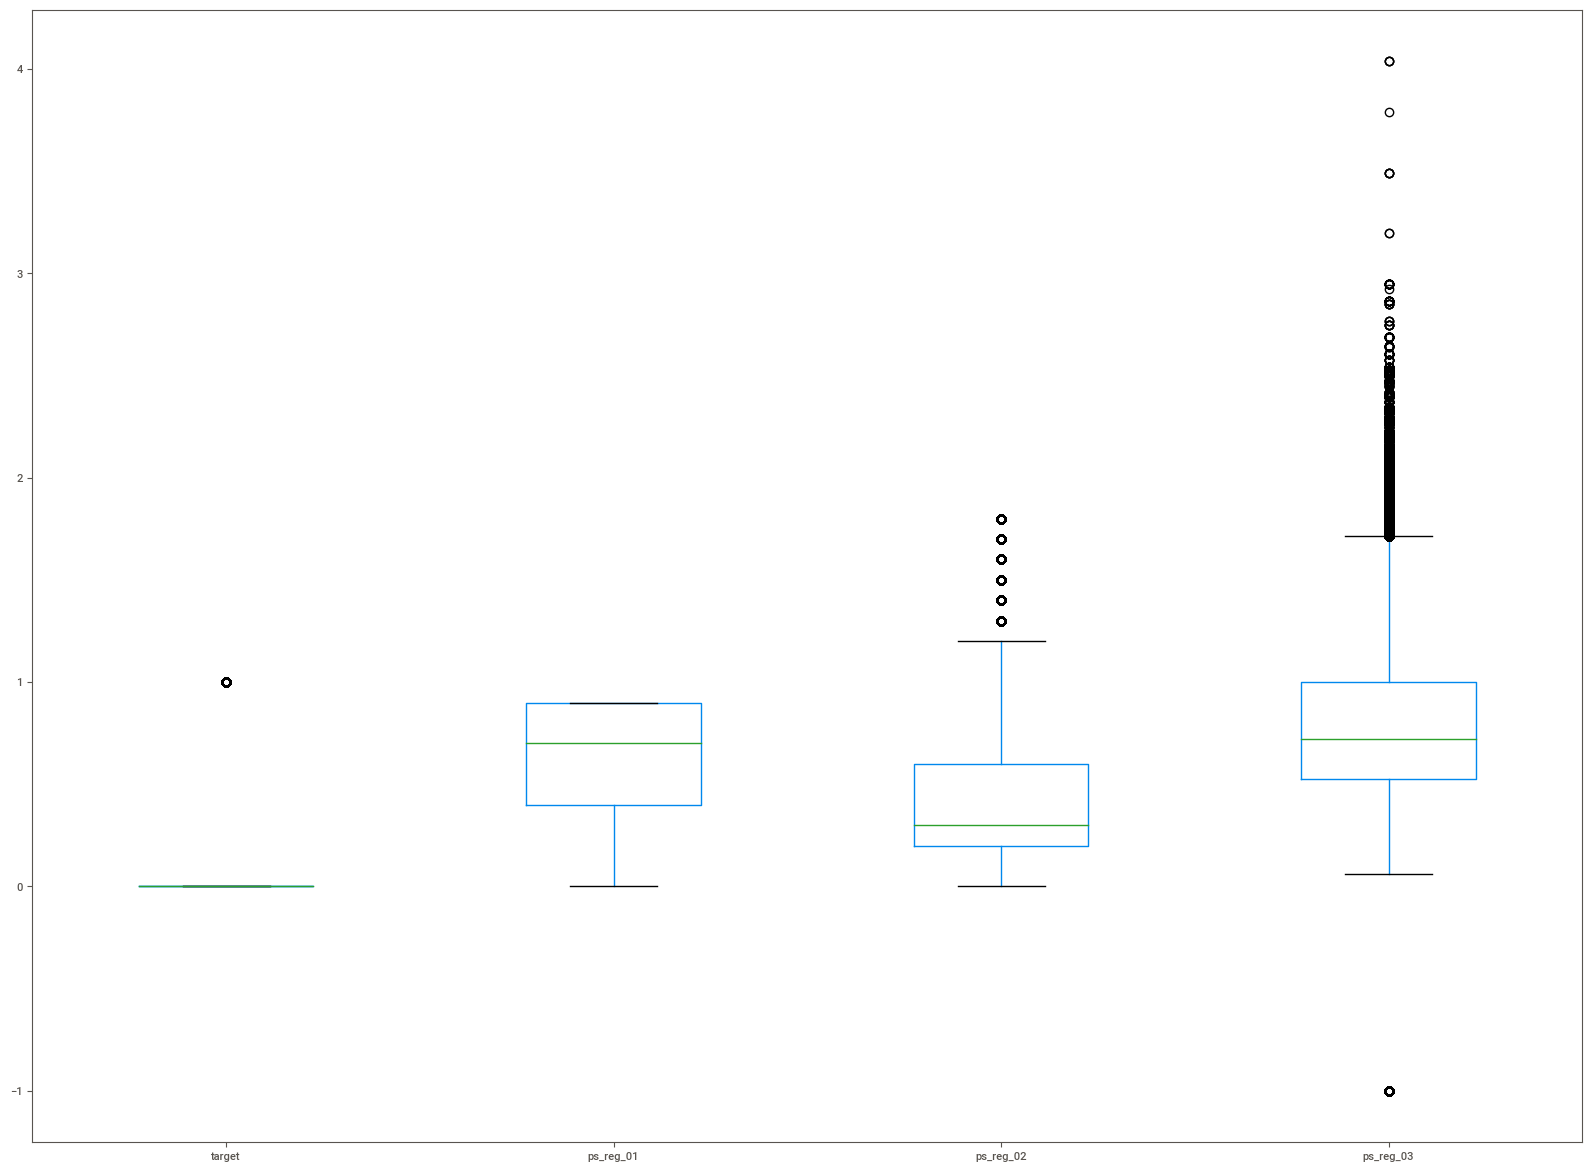

<Figure size 600x600 with 0 Axes>

In [ ]:
df_ps_reg.drop('id', axis=1).plot.box()
plt.figure(figsize=(6,6))
plt.show()

Quantidade de registros por dimensão na coluna PS_REG_03
-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 0.301040         1
 1.409787         1
 2.090155         1
 1.772357         1
 1.888452         1
Name: ps_reg_03, Length: 5013, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


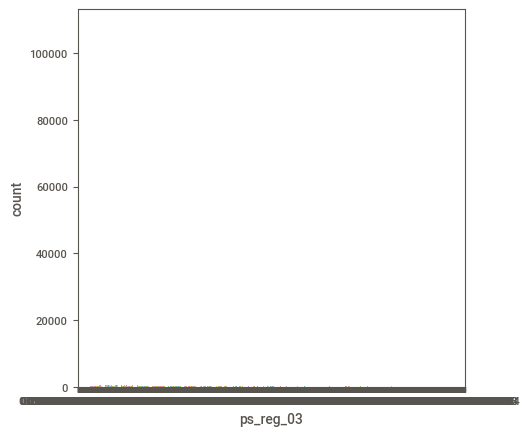

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_reg_03"

qtd_outliers = df_ps_reg['ps_reg_03'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_REG_03')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(5,5))
sns.countplot(df_ps_reg['ps_reg_03'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

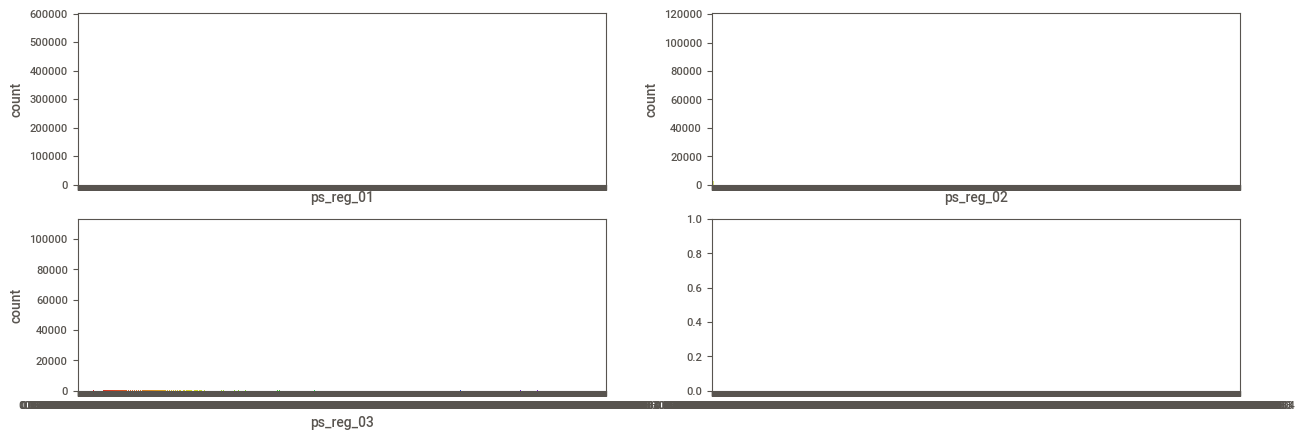

In [ ]:
# Grupo 4: Index(['id', 'target', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03')

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_reg['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_reg['ps_reg_01'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_reg['ps_reg_02'],palette='summer',ax=ax2)
sns.countplot(df_ps_reg['ps_reg_03'],palette='gist_rainbow',ax=ax3)

#ANALISE DO RESULTADO - GRUPO 4:
Quantidade muito grande de valores Nulos (-1). Os valores estão como 0., o que gera dificuldade na análise dos dados.
Coluna reg 03 não será considerada pelo fato de ter muitos outliers e valores nulos.


##**GRUPO 5**

In [ ]:
df_ps_car = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car_cat + lista_ps_cal + lista_ps_cal_bin
df_ps_car = df_ps_car.drop(lista, axis=1)

df_ps_car.describe()

,id,target,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,2.346072,0.379945,0.813265,0.276256,3.065899
std,4.293678e+05,0.187401,0.832548,0.058327,0.224588,0.357154,0.731366
min,7.000000e+00,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000
25%,3.719915e+05,0.000000,2.000000,0.316228,0.670867,0.333167,2.828427
50%,7.435475e+05,0.000000,3.000000,0.374166,0.765811,0.368782,3.316625
75%,1.115549e+06,0.000000,3.000000,0.400000,0.906190,0.396485,3.605551
max,1.488027e+06,1.000000,3.000000,1.264911,3.720626,0.636396,3.741657


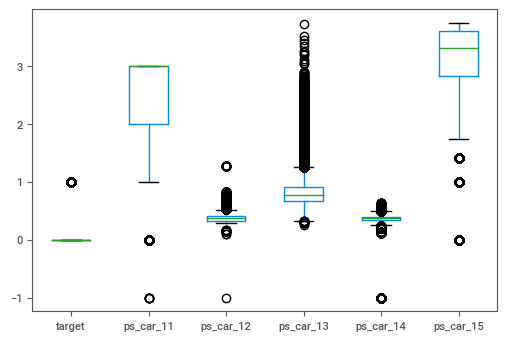

In [ ]:
df_ps_car.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_CAR_11
 3    318919
 2    189353
 1     60952
 0     25983
-1         5
Name: ps_car_11, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


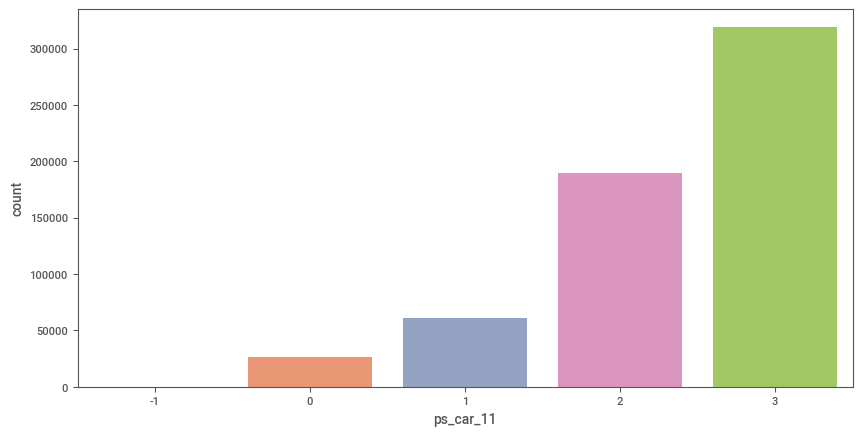

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_car['ps_car_11'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_11')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_car['ps_car_11'], palette="Set2")

Quantidade de registros por dimensão na coluna PS_CAR_15
3.605551    109765
3.464102     77200
3.316625     68737
3.162278     63323
3.741657     57757
2.828427     48680
3.000000     48537
2.645751     30388
2.449490     20445
2.236068     19397
0.000000     14186
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: ps_car_15, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


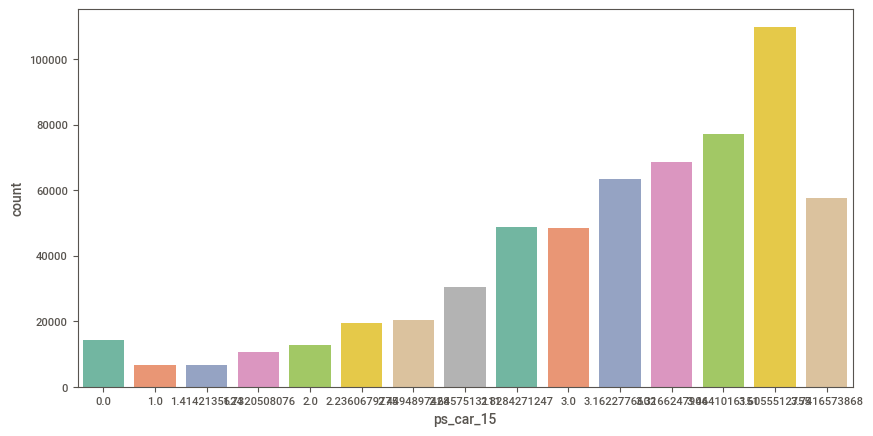

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_15"

qtd_outliers = df_ps_car['ps_car_15'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_15')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_car['ps_car_15'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

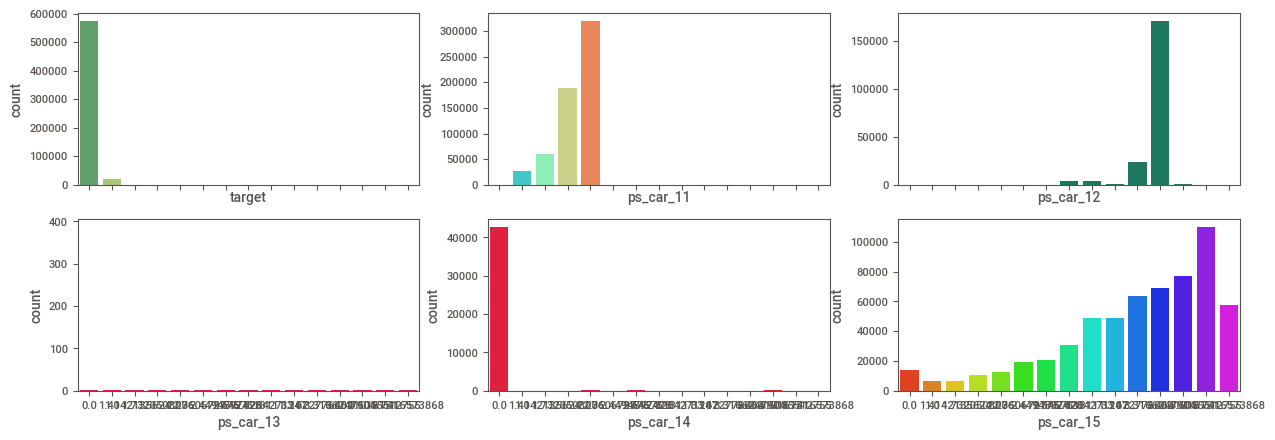

In [ ]:
# Grupo 5: Index(['id', 'target', 'ps_car_11','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15')

fig,ax = plt.subplots(2,3,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(df_ps_car['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_car['ps_car_11'],palette='rainbow',ax=ax2)
sns.countplot(df_ps_car['ps_car_12'],palette='summer',ax=ax3)
sns.countplot(df_ps_car['ps_car_13'],palette='gist_rainbow',ax=ax4)
sns.countplot(df_ps_car['ps_car_14'],palette='gist_rainbow',ax=ax5)
sns.countplot(df_ps_car['ps_car_15'],palette='gist_rainbow',ax=ax6)

#ANALISE DO RESULTADO - GRUPO 5:

**Tarefas: Tratar os valores nulos, quando mandamos para publicação, os gráficos ficam em preto e branco, porém quando é eletrônico, pode ficar colorido Livro -- Storytelling with data** 
**Tarefa 1 - encerrar a análise exploratória** 
**Tarefa 2 - Escrever um pouco mais organizado o que queriamos fazer e os resultados encontrados**
**Tarefa 3 - Livro capitulo 7 - Página 311 a 370 - Nesse capitulo tem os conceitos de regressão - Ler esse capitulo antes da próxima reunião - Vamos usar um modelo de regressão que usa uma função logistica. VOcê aprende o conceito, entende os conceitos básicos, saber o que o computador está fazendo por nós. QUando começa a explicar as formulas da matemática, pode pular. A regressão tenta minimizar o erro. Marcar reunião com o grupo para leitura**

##**GRUPO 6**

In [ ]:
df_ps_car_cat = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_cal + lista_ps_cal_bin
df_ps_car_cat = df_ps_car_cat.drop(lista, axis=1)

df_ps_car_cat.describe()

,id,target,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674
std,4.293678e+05,0.187401,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455
min,7.000000e+00,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000
25%,3.719915e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,7.435475e+05,0.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,1.115549e+06,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,1.488027e+06,1.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


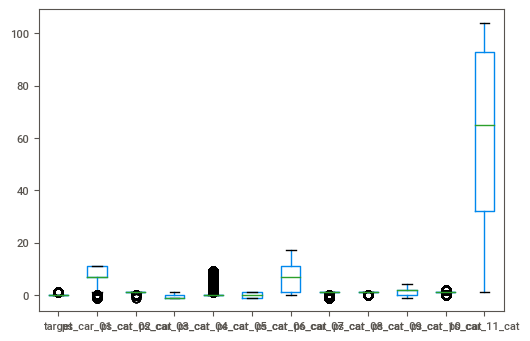

In [ ]:
df_ps_car_cat.drop('id', axis=1).plot.box()

Possível ver que a coluna com valores totalmente fora do padrão das demais é a "ps_car_11_cat", que possui valores listados de "0" à "100"

Quantidade de registros por dimensão na coluna PS_CAR_11_CAT
104    85083
103    24262
64     22278
87     17106
32     12578
       ...  
58      1464
81      1433
56      1272
18      1233
63      1103
Name: ps_car_11_cat, Length: 104, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


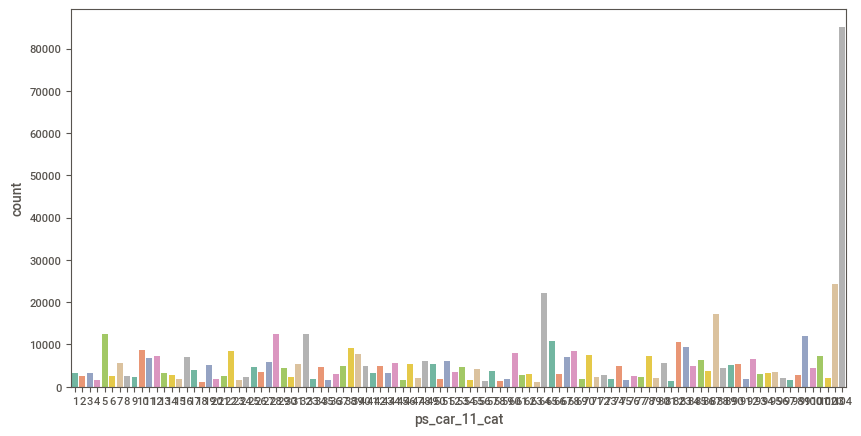

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_car_cat['ps_car_11_cat'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CAR_11_CAT')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_car_cat['ps_car_11_cat'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

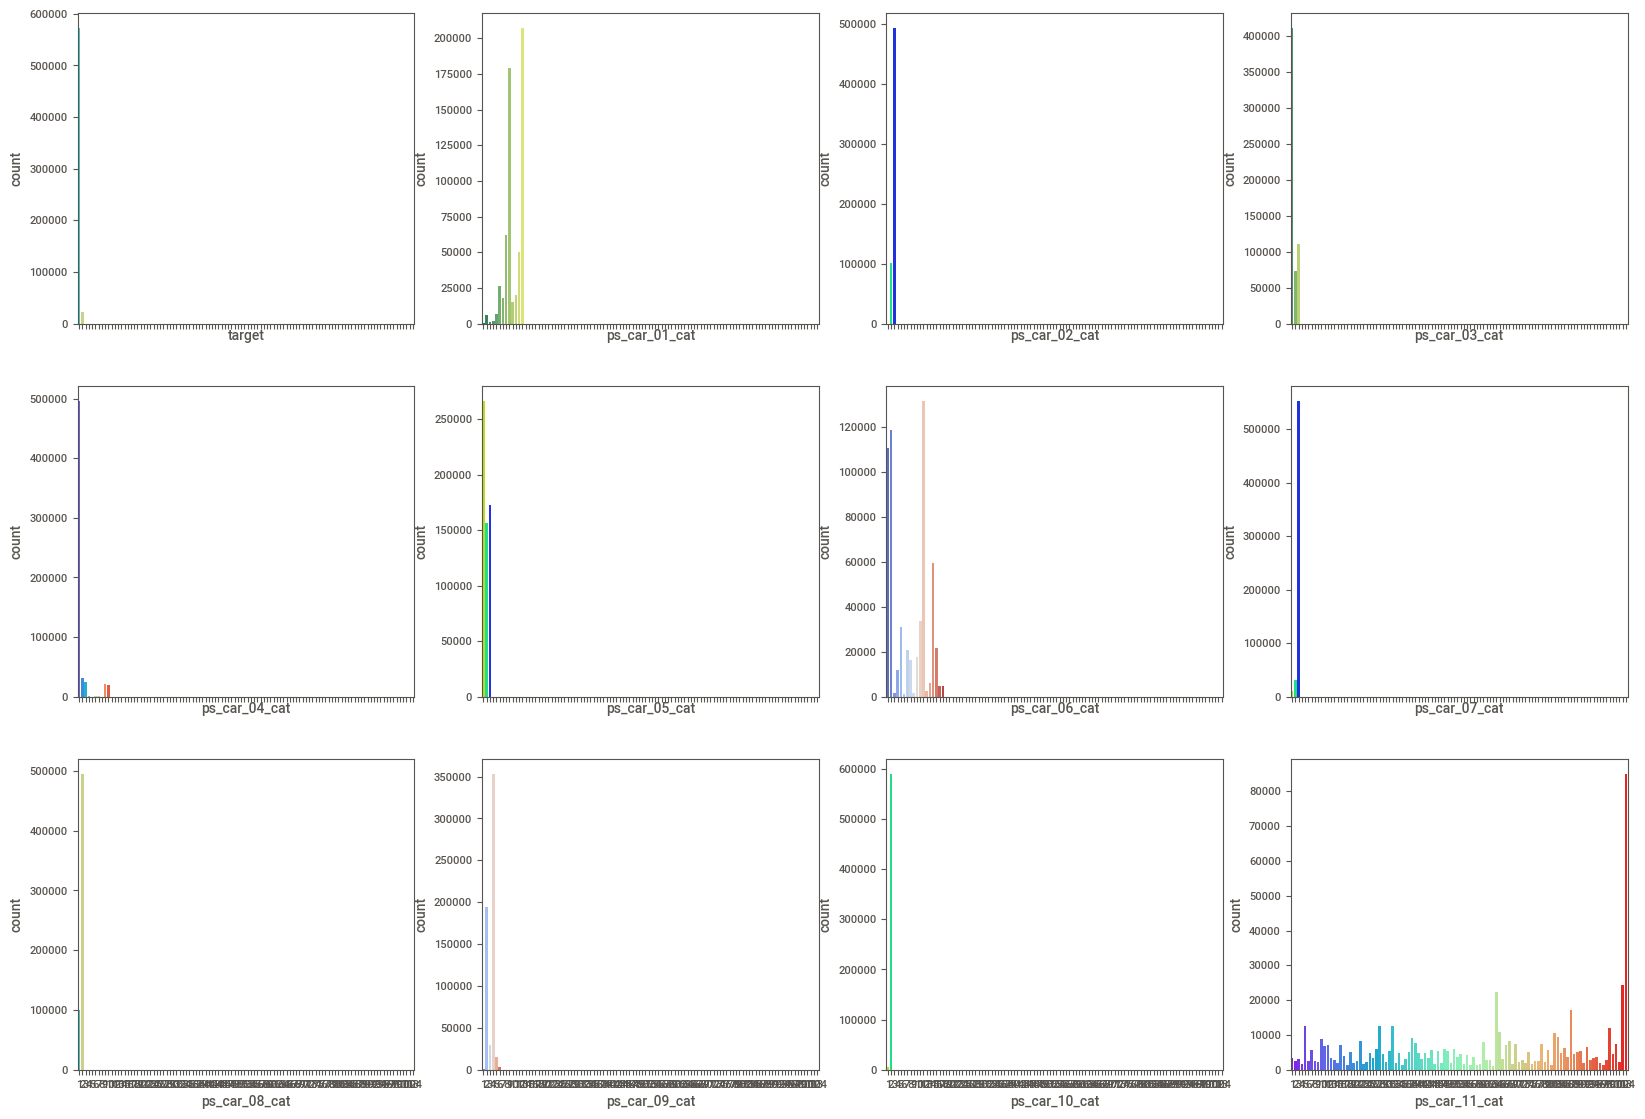

In [ ]:
# Grupo 6: Index('id', 'target','ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat','ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat','ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat')

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_car_cat['target'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_car_cat['ps_car_01_cat'],palette='summer',ax=ax2)
sns.countplot(df_ps_car_cat['ps_car_02_cat'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_car_cat['ps_car_03_cat'],palette='summer',ax=ax4)
sns.countplot(df_ps_car_cat['ps_car_04_cat'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_car_cat['ps_car_05_cat'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_car_cat['ps_car_06_cat'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_car_cat['ps_car_07_cat'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_car_cat['ps_car_08_cat'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_car_cat['ps_car_09_cat'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_car_cat['ps_car_10_cat'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_car_cat['ps_car_11_cat'],palette='rainbow',ax=ax12)

#ANALISE DO RESULTADO - GRUPO 6:

##**GRUPO 7**

In [ ]:
df_ps_cal = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal_bin
df_ps_cal = df_ps_cal.drop(lista, axis=1)

df_ps_cal.describe()

,id,target,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,4.293678e+05,0.187401,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,7.435475e+05,0.000000,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,1.115549e+06,0.000000,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,1.488027e+06,1.000000,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


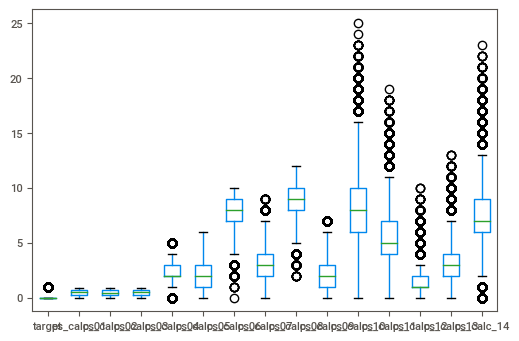

In [ ]:
df_ps_cal.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_CALC_05
2    195160
1    170860
3    119192
0     61226
4     40682
5      7534
6       558
Name: ps_calc_05, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


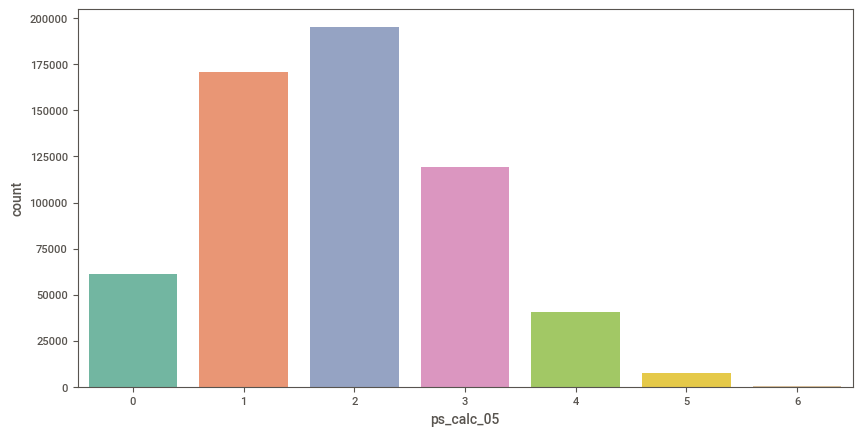

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_car_11"

qtd_outliers = df_ps_cal['ps_calc_05'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CALC_05')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_cal['ps_calc_05'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

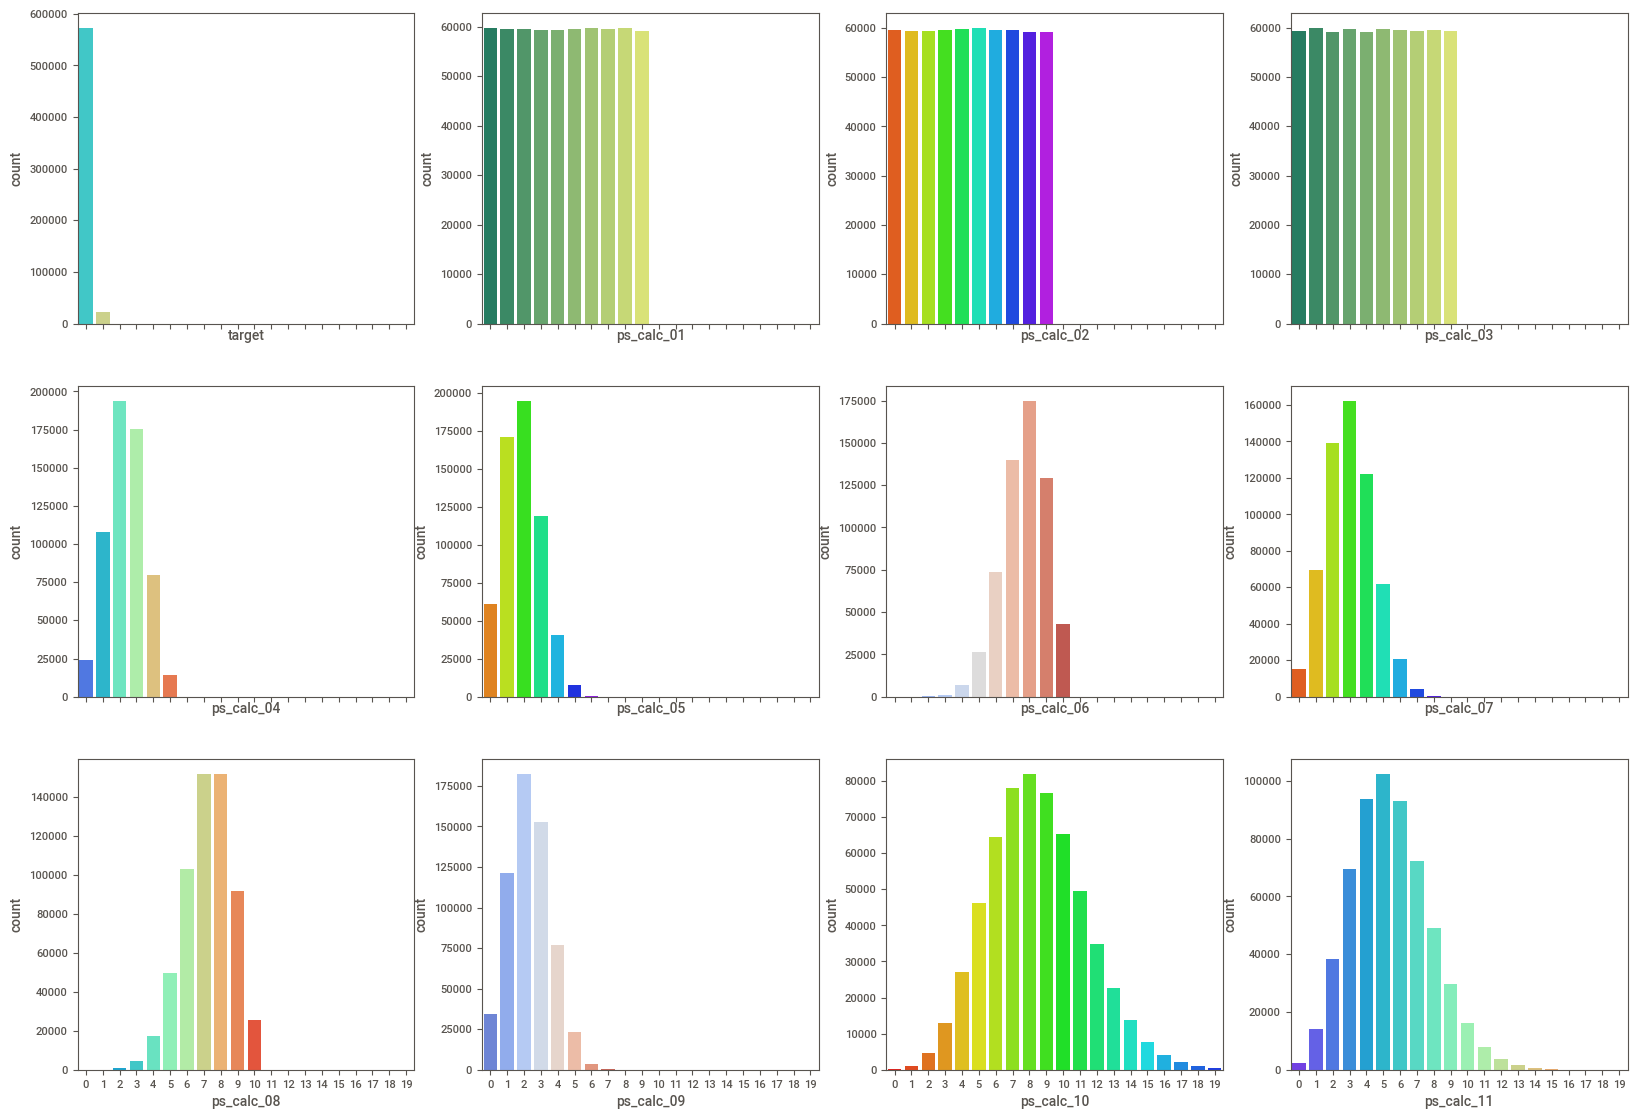

In [ ]:
# Grupo 7: Index('id', 'ps_calc_01','ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06','ps_calc_07','ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11','ps_calc_12', 'ps_calc_13', 'ps_calc_14')

 

fig,ax = plt.subplots(3,4,figsize=(20,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = ax.flatten()
sns.countplot(df_ps_cal['target'],palette='rainbow',ax=ax1)
sns.countplot(df_ps_cal['ps_calc_01'],palette='summer',ax=ax2)
sns.countplot(df_ps_cal['ps_calc_02'],palette='gist_rainbow',ax=ax3)
sns.countplot(df_ps_cal['ps_calc_03'],palette='summer',ax=ax4)
sns.countplot(df_ps_cal['ps_calc_04'],palette='rainbow',ax=ax5)
sns.countplot(df_ps_cal['ps_calc_05'],palette='gist_rainbow',ax=ax6)
sns.countplot(df_ps_cal['ps_calc_06'],palette='coolwarm',ax=ax7)
sns.countplot(df_ps_cal['ps_calc_07'],palette='gist_rainbow',ax=ax8)
sns.countplot(df_ps_cal['ps_calc_08'],palette='rainbow',ax=ax9)
sns.countplot(df_ps_cal['ps_calc_09'],palette='coolwarm',ax=ax10)
sns.countplot(df_ps_cal['ps_calc_10'],palette='gist_rainbow',ax=ax11)
sns.countplot(df_ps_cal['ps_calc_11'],palette='rainbow',ax=ax12)

#ANALISE DO RESULTADO - GRUPO 7:

##**GRUPO 8**

In [ ]:
df_ps_cal_bin = df_train

lista =  lista_ps_ind + lista_ps_ind_cat + lista_ps_ind_bin + lista_ps_reg + lista_ps_car + lista_ps_car_cat + lista_ps_cal
df_ps_cal_bin = df_ps_cal_bin.drop(lista, axis=1)

df_ps_cal_bin.describe()

,id,target,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


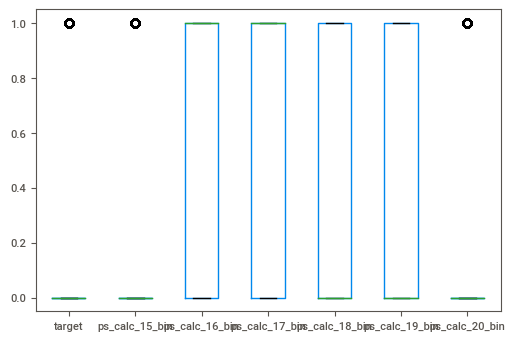

In [ ]:
df_ps_cal_bin.drop('id', axis=1).plot.box()

Quantidade de registros por dimensão na coluna PS_CALC_20_BIN
0    503955
1     91257
Name: ps_calc_20_bin, dtype: int64
***************************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


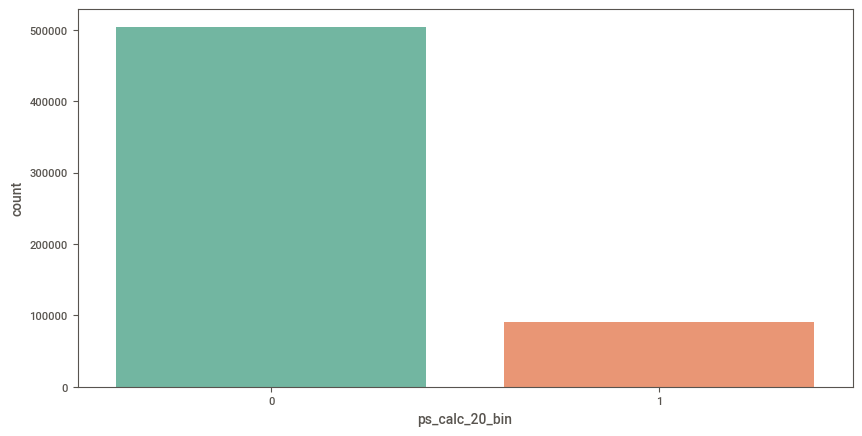

In [ ]:
# Analisa o gráfico anteriores, vamos identificar os outliers pertencentes a coluna "ps_calc_20_bin"

qtd_outliers = df_ps_cal_bin['ps_calc_20_bin'].value_counts()

print('Quantidade de registros por dimensão na coluna PS_CALC_20_BIN')
print(qtd_outliers)

print("***************************************************************")



plt.figure(figsize=(10,5))
sns.countplot(df_ps_cal_bin['ps_calc_20_bin'], palette="Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

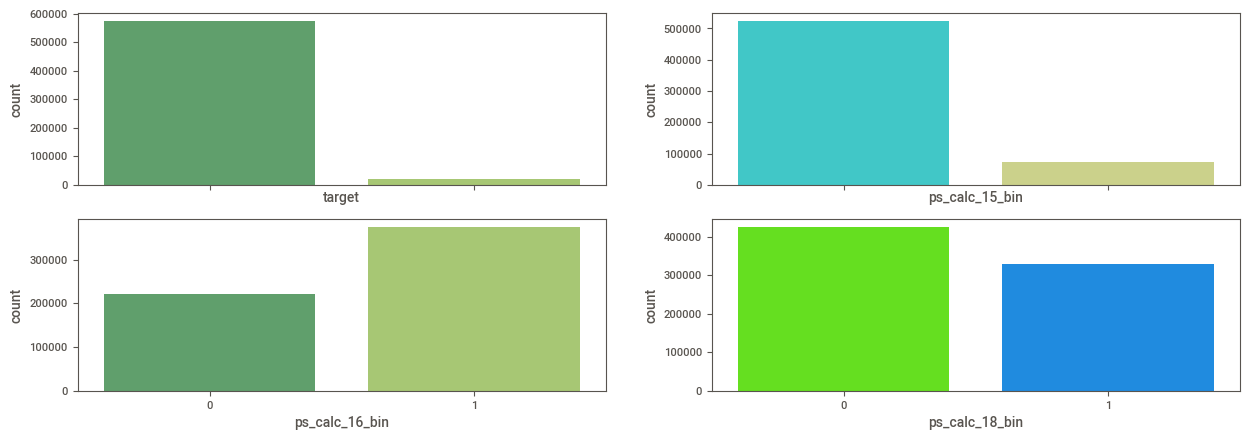

In [ ]:
# Grupo 8: Index(['id', 'target', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin')

fig,ax = plt.subplots(2,2,figsize=(15,5),sharex='all')
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(df_ps_cal_bin['target'],palette='summer',ax=ax1)
sns.countplot(df_ps_cal_bin['ps_calc_15_bin'],palette='rainbow',ax=ax2)
sns.countplot(df_ps_cal_bin['ps_calc_16_bin'],palette='summer',ax=ax3)
sns.countplot(df_ps_cal_bin['ps_calc_17_bin'],palette='gist_rainbow',ax=ax4)
sns.countplot(df_ps_cal_bin['ps_calc_18_bin'],palette='gist_rainbow',ax=ax4)

#ANALISE DO RESULTADO - GRUPO 8:

# ARQUIVO DE TESTE


---



In [ ]:
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/02%20-%20TEST/test_01.csv'
  
df_test = pd.read_csv(url, error_bad_lines=False, delimiter=';')
  
url = 'https://raw.githubusercontent.com/danilosrm/projeto_MDD/main/00%20-%20FONTES/02%20-%20TEST/test_02.csv'
  
df2_test = pd.read_csv(url, error_bad_lines=False, delimiter=';')
  
df_test = df_test.append(df2_test)

In [ ]:
df_test.columns

In [ ]:
df_test.info()